# Sweet n Sour Sentiment on the Street
Georgia Tech Data Science Bootcamp - Cohort 6
Final Project
Team Members:
* Joseph Ayala
* Andrew Behrman
* Michael Fox
* Michael Hankinson

### Regression Analysis

#### This notebook is designed to run a multi-variate regression analysis on the various ticker features and determine which is most influential

In [117]:
import pandas as pd


In [118]:
df = pd.read_csv('../db/complete_merged_dataset.csv')
df.columns

Index(['Unnamed: 0', 'call_datetime', 'Unnamed: 0_x', 'id', 'sentiment',
       'sentence', 'ticker', 'call_title', 'speaker', 'call_section',
       'vader_sentiment', 'call_date', 'call_time', 'unique_id', 'base_date',
       'next_date', 'base_close', 'base_volume', 'next_close', 'next_volume',
       'Unnamed: 0_y', 'marketCap', 'percent_change_price',
       'percent_change_volume'],
      dtype='object')

In [119]:
df['binary_price_change'] = df['percent_change_price'].apply(lambda x: 1 if (x > 0) else 0)
df.head()

,Unnamed: 0,call_datetime,Unnamed: 0_x,id,sentiment,sentence,ticker,call_title,speaker,call_section,...,next_date,base_close,base_volume,next_close,next_volume,Unnamed: 0_y,marketCap,percent_change_price,percent_change_volume,binary_price_change
0,0,2019-11-01 10:00:00,457,457,NaN,Good morning and welcome to the Dominion Ener...,D,"Dominion Energy, Inc. (NYSE:D) Q3 2019 Earning...",Operator,operator_instruction,...,2019-11-01,82.550003,2424000.0,83.269997,3169600.0,D,67584167936,0.872191,30.759076,1
1,1,2019-11-01 10:00:00,458,458,NaN,"At this time, each of your lines is in a liste...",D,"Dominion Energy, Inc. (NYSE:D) Q3 2019 Earning...",Operator,operator_instruction,...,2019-11-01,82.550003,2424000.0,83.269997,3169600.0,D,67584167936,0.872191,30.759076,1
2,2,2019-11-01 10:00:00,459,459,NaN,"At the conclusion of today’s presentation, we ...",D,"Dominion Energy, Inc. (NYSE:D) Q3 2019 Earning...",Operator,operator_instruction,...,2019-11-01,82.550003,2424000.0,83.269997,3169600.0,D,67584167936,0.872191,30.759076,1
3,3,2019-11-01 10:00:00,460,460,NaN,[Operator Instructions] I would now like to tu...,D,"Dominion Energy, Inc. (NYSE:D) Q3 2019 Earning...",Operator,operator_instruction,...,2019-11-01,82.550003,2424000.0,83.269997,3169600.0,D,67584167936,0.872191,30.759076,1
4,4,2019-11-01 10:00:00,461,461,NaN,Good morning and welcome.,D,"Dominion Energy, Inc. (NYSE:D) Q3 2019 Earning...",Steven Ridge,presentation,...,2019-11-01,82.550003,2424000.0,83.269997,3169600.0,D,67584167936,0.872191,30.759076,1


In [120]:
group = df.groupby(by=['ticker','call_section'])
grouped_df = pd.DataFrame((group['vader_sentiment','marketCap','base_volume','percent_change_price',
                                 'percent_change_volume','binary_price_change']).mean())
grouped_df.head()

vader_sentiment     marketCap  base_volume  \
ticker call_section                                                       
AAP    answer                       0.227533   11265734656    1805500.0   
       operator_instruction         0.070109   11265734656    1805500.0   
       presentation                 0.435914   11265734656    1805500.0   
       question                     0.132848   11265734656    1805500.0   
ABBV   answer                       0.233434  131067805696   10009400.0   

                             percent_change_price  percent_change_volume  \
ticker call_section                                                        
AAP    answer                           -7.510963             141.334810   
       operator_instruction             -7.510963             141.334810   
       presentation                     -7.510963             141.334810   
       question                         -7.510963             141.334810   
ABBV   answer                            2.765552              33.437569   

                             binary_price_change  
ticker call_section                               
AAP    answer                                  0  
       operator_instruction                    0  
       presentation                            0  
       question                                0  
ABBV   answer                                  1

In [121]:
grouped_df = grouped_df.reset_index()
grouped_df.head()

,ticker,call_section,vader_sentiment,marketCap,base_volume,percent_change_price,percent_change_volume,binary_price_change
0,AAP,answer,0.227533,11265734656,1805500.0,-7.510963,141.334810,0
1,AAP,operator_instruction,0.070109,11265734656,1805500.0,-7.510963,141.334810,0
2,AAP,presentation,0.435914,11265734656,1805500.0,-7.510963,141.334810,0
3,AAP,question,0.132848,11265734656,1805500.0,-7.510963,141.334810,0
4,ABBV,answer,0.233434,131067805696,10009400.0,2.765552,33.437569,1


In [122]:
grouped_df.drop(columns='ticker',inplace=True)
grouped_df.head()

,call_section,vader_sentiment,marketCap,base_volume,percent_change_price,percent_change_volume,binary_price_change
0,answer,0.227533,11265734656,1805500.0,-7.510963,141.334810,0
1,operator_instruction,0.070109,11265734656,1805500.0,-7.510963,141.334810,0
2,presentation,0.435914,11265734656,1805500.0,-7.510963,141.334810,0
3,question,0.132848,11265734656,1805500.0,-7.510963,141.334810,0
4,answer,0.233434,131067805696,10009400.0,2.765552,33.437569,1


In [123]:
grouped_df = pd.get_dummies(grouped_df, columns=['call_section'])
grouped_df.head()

,vader_sentiment,marketCap,base_volume,percent_change_price,percent_change_volume,binary_price_change,call_section_answer,call_section_operator_instruction,call_section_presentation,call_section_question
0,0.227533,11265734656,1805500.0,-7.510963,141.334810,0,1,0,0,0
1,0.070109,11265734656,1805500.0,-7.510963,141.334810,0,0,1,0,0
2,0.435914,11265734656,1805500.0,-7.510963,141.334810,0,0,0,1,0
3,0.132848,11265734656,1805500.0,-7.510963,141.334810,0,0,0,0,1
4,0.233434,131067805696,10009400.0,2.765552,33.437569,1,1,0,0,0


In [130]:
grouped_df['vader_operator'] = grouped_df['call_section_operator_instruction'] * grouped_df['vader_sentiment']
grouped_df['vader_presentation'] = grouped_df['call_section_presentation'] * grouped_df['vader_sentiment']
grouped_df['vader_question'] = grouped_df['call_section_question'] * grouped_df['vader_sentiment']
grouped_df['vader_answer'] = grouped_df['call_section_answer'] * grouped_df['vader_sentiment']
grouped_df.head()

,vader_sentiment,marketCap,base_volume,percent_change_price,percent_change_volume,binary_price_change,call_section_answer,call_section_operator_instruction,call_section_presentation,call_section_question,vader_operator,vader_presentation,vader_question,vader_answer
0,0.227533,11265734656,1805500.0,-7.510963,141.334810,0,1,0,0,0,0.000000,0.000000,0.000000,0.227533
1,0.070109,11265734656,1805500.0,-7.510963,141.334810,0,0,1,0,0,0.070109,0.000000,0.000000,0.000000
2,0.435914,11265734656,1805500.0,-7.510963,141.334810,0,0,0,1,0,0.000000,0.435914,0.000000,0.000000
3,0.132848,11265734656,1805500.0,-7.510963,141.334810,0,0,0,0,1,0.000000,0.000000,0.132848,0.000000
4,0.233434,131067805696,10009400.0,2.765552,33.437569,1,1,0,0,0,0.000000,0.000000,0.000000,0.233434


In [131]:
grouped_df.describe()

,vader_sentiment,marketCap,base_volume,percent_change_price,percent_change_volume,binary_price_change,call_section_answer,call_section_operator_instruction,call_section_presentation,call_section_question,vader_operator,vader_presentation,vader_question,vader_answer
count,325.000000,3.250000e+02,3.250000e+02,325.000000,325.000000,325.000000,325.000000,325.000000,325.000000,325.000000,325.000000,325.000000,325.000000,325.000000
mean,0.235768,4.877430e+10,5.659208e+06,-0.177755,94.550069,0.550769,0.249231,0.249231,0.252308,0.249231,0.037295,0.076098,0.060768,0.061606
std,0.080048,5.924841e+10,1.025177e+07,5.685890,120.480929,0.498183,0.433235,0.433235,0.435007,0.433235,0.069926,0.135648,0.108834,0.110976
min,0.053386,5.205218e+09,2.280000e+05,-20.808657,-30.405860,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.180026,1.233534e+10,1.473700e+06,-2.840792,28.774031,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.236975,2.355240e+10,2.525500e+06,0.580556,65.650464,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.295556,5.599563e+10,6.038700e+06,3.042750,118.621868,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.077251,0.000000,0.000000
max,0.435914,2.962090e+11,7.865600e+07,13.692753,771.327086,1.000000,1.000000,1.000000,1.000000,1.000000,0.248658,0.435914,0.353182,0.401884


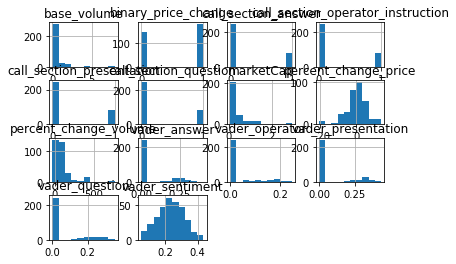

In [132]:
import pylab as pl
grouped_df.hist()
pl.show()

In [133]:
grouped_df.head()

,vader_sentiment,marketCap,base_volume,percent_change_price,percent_change_volume,binary_price_change,call_section_answer,call_section_operator_instruction,call_section_presentation,call_section_question,vader_operator,vader_presentation,vader_question,vader_answer
0,0.227533,11265734656,1805500.0,-7.510963,141.334810,0,1,0,0,0,0.000000,0.000000,0.000000,0.227533
1,0.070109,11265734656,1805500.0,-7.510963,141.334810,0,0,1,0,0,0.070109,0.000000,0.000000,0.000000
2,0.435914,11265734656,1805500.0,-7.510963,141.334810,0,0,0,1,0,0.000000,0.435914,0.000000,0.000000
3,0.132848,11265734656,1805500.0,-7.510963,141.334810,0,0,0,0,1,0.000000,0.000000,0.132848,0.000000
4,0.233434,131067805696,10009400.0,2.765552,33.437569,1,1,0,0,0,0.000000,0.000000,0.000000,0.233434


In [142]:
from pandas import DataFrame
from sklearn import linear_model
# train test split
from sklearn.model_selection import train_test_split

X = grouped_df.drop(columns=['vader_sentiment','percent_change_price','percent_change_volume','binary_price_change',
                            'call_section_answer','call_section_operator_instruction','call_section_presentation',
                            'call_section_question']) # here we have variables for multiple regression. 
#Y = grouped_df['percent_change_price']
Y = grouped_df['binary_price_change']

X_train, X_test, y_train, y_test = train_test_split(X, Y, random_state=1)

# with sklearn
#regr = linear_model.LinearRegression()
regr = linear_model.LogisticRegression()
regr.fit(X_train, y_train)

print('sklearn results:')
print('Intercept: \n', regr.intercept_)
print('Coefficients: \n', regr.coef_)



sklearn results:
Intercept: 
 [-3.05869831e-23]
Coefficients: 
 [[ 5.10917813e-12  8.60451585e-16  5.37482921e-24 -1.38926668e-23
  -2.42669196e-24 -1.35852747e-24]]


/Users/i817245/anaconda3/envs/gtfinalproj/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [143]:
import statsmodels.api as sm
logit_model=sm.Logit(y_train, X_train)
result=logit_model.fit()
print(result.summary2())


Optimization terminated successfully.
         Current function value: 0.673442
         Iterations 6
                          Results: Logit
Model:              Logit               Pseudo R-squared: 0.026   
Dependent Variable: binary_price_change AIC:              339.2926
Date:               2019-11-17 11:59    BIC:              360.2510
No. Observations:   243                 Log-Likelihood:   -163.65 
Df Model:           5                   LL-Null:          -168.09 
Df Residuals:       237                 LLR p-value:      0.11390 
Converged:          1.0000              Scale:            1.0000  
No. Iterations:     6.0000                                        
------------------------------------------------------------------
                     Coef.  Std.Err.    z    P>|z|   [0.025 0.975]
------------------------------------------------------------------
marketCap            0.0000   0.0000  1.8590 0.0630 -0.0000 0.0000
base_volume          0.0000   0.0000  0.4308 0.6666 -

In [145]:
y_pred = regr.predict(X_test)
y_pred

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1])

In [91]:
y_test

10    1
70    1
47    1
54    0
40    0
65    1
59    0
81    0
77    0
45    0
76    0
66    1
48    1
36    1
63    0
27    0
35    1
31    0
51    1
39    1
2     0
Name: binary_price_change, dtype: int64

In [149]:
# try random forest
from sklearn.ensemble import RandomForestClassifier

# Instantiate model with 500 decision trees
rf = RandomForestClassifier(n_estimators = 500, random_state = 1, verbose=2)

# Train the model on training data
rf.fit(X_train, y_train);

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s


building tree 1 of 500
building tree 2 of 500
building tree 3 of 500
building tree 4 of 500
building tree 5 of 500
building tree 6 of 500
building tree 7 of 500
building tree 8 of 500
building tree 9 of 500
building tree 10 of 500
building tree 11 of 500
building tree 12 of 500
building tree 13 of 500
building tree 14 of 500
building tree 15 of 500
building tree 16 of 500
building tree 17 of 500
building tree 18 of 500
building tree 19 of 500
building tree 20 of 500
building tree 21 of 500
building tree 22 of 500
building tree 23 of 500
building tree 24 of 500
building tree 25 of 500
building tree 26 of 500
building tree 27 of 500
building tree 28 of 500
building tree 29 of 500
building tree 30 of 500
building tree 31 of 500
building tree 32 of 500
building tree 33 of 500
building tree 34 of 500
building tree 35 of 500
building tree 36 of 500
building tree 37 of 500
building tree 38 of 500
building tree 39 of 500
building tree 40 of 500
building tree 41 of 500
building tree 42 of 500
b

building tree 342 of 500
building tree 343 of 500
building tree 344 of 500
building tree 345 of 500
building tree 346 of 500
building tree 347 of 500
building tree 348 of 500
building tree 349 of 500
building tree 350 of 500
building tree 351 of 500
building tree 352 of 500
building tree 353 of 500
building tree 354 of 500
building tree 355 of 500
building tree 356 of 500
building tree 357 of 500
building tree 358 of 500
building tree 359 of 500
building tree 360 of 500
building tree 361 of 500
building tree 362 of 500
building tree 363 of 500
building tree 364 of 500
building tree 365 of 500
building tree 366 of 500
building tree 367 of 500
building tree 368 of 500
building tree 369 of 500
building tree 370 of 500
building tree 371 of 500
building tree 372 of 500
building tree 373 of 500
building tree 374 of 500
building tree 375 of 500
building tree 376 of 500
building tree 377 of 500
building tree 378 of 500
building tree 379 of 500
building tree 380 of 500
building tree 381 of 500


[Parallel(n_jobs=1)]: Done 500 out of 500 | elapsed:    0.6s finished


In [150]:
y_pred = rf.predict(X_test)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done 500 out of 500 | elapsed:    0.1s finished


In [151]:
y_pred

array([1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0,
       0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1])

In [152]:
df_result = pd.DataFrame({
    'y_test': y_test,
    'y_pred': y_pred
})
df_result

,y_test,y_pred
139,1,1
232,1,1
213,0,0
184,0,1
138,1,0
...,...,...
188,1,1
70,0,0
168,0,1
222,0,0


In [156]:
print('Random Forest Accuracy of Predicting Positive/Negative price Change: ')
print(rf.score(X_test, y_test))

Random Forest Accuracy of Predicting Positive/Negative price Change: 
0.7682926829268293


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done 500 out of 500 | elapsed:    0.1s finished


In [157]:
rf.feature_importances_

array([0.35150883, 0.34690627, 0.07790358, 0.07443611, 0.07429494,
       0.07495027])

In [158]:
X_test.columns

Index(['marketCap', 'base_volume', 'vader_operator', 'vader_presentation',
       'vader_question', 'vader_answer'],
      dtype='object')